In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import re

In [ ]:
df = pd.read_csv('LinkedIn_Jobs_Data_Scientist_Mexico.csv')

# EDA Analysis

## General Overview & Descriptive Analysis

### Distribution of Job Postings by Location

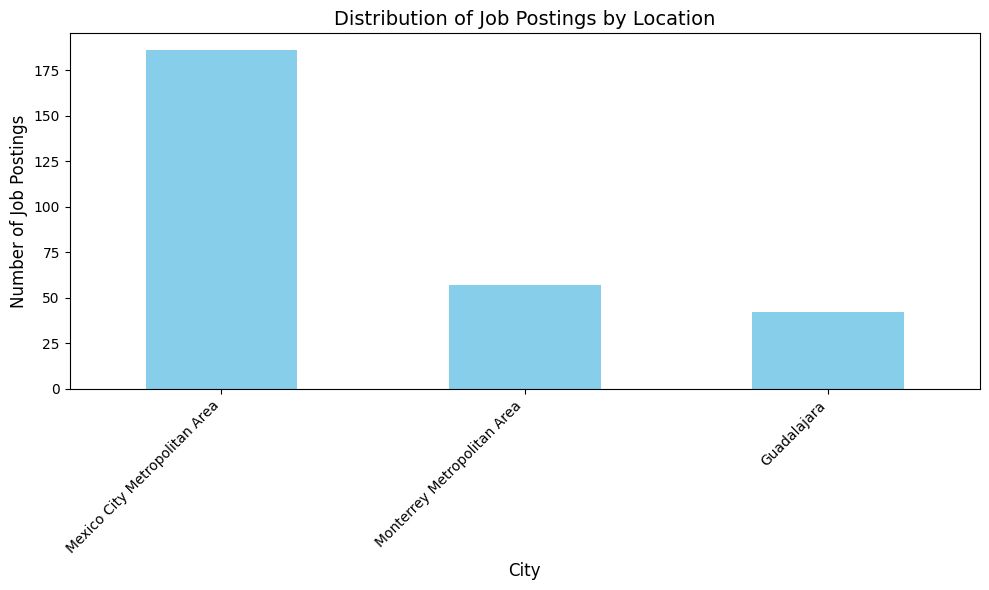

In [44]:
location_counts = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Postings by Location', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


* The city with the highest number of job postings is Mexico City Metropolitan Area, with 186 postings, indicating it is a major hub for Data Science jobs in Mexico.
* Monterrey Metropolitan Area follows with 57 postings, and Guadalajara has 42 postings.
* These three cities dominate the Data Science job market, making up the majority of job postings in the dataset.

### Distribution of Seniority Levels

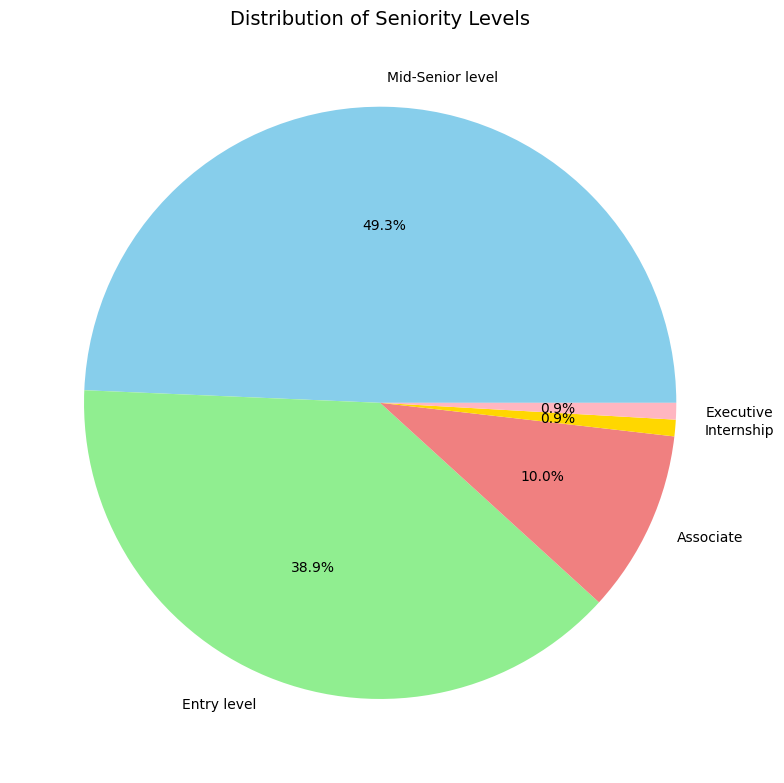

In [45]:
# Group data by seniority level and count the number of job postings per category
seniority_counts = df['SeniorityLevel'].value_counts()

# Plot the distribution of seniority levels as a pie chart
plt.figure(figsize=(8, 8))
seniority_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('Distribution of Seniority Levels', fontsize=14)
plt.ylabel('')  # Remove the default ylabel

# Show plot
plt.tight_layout()
plt.show()


* The majority of the postings are for Mid-Senior level positions, accounting for 49.3% of the total job postings.
* Entry-level positions make up 39% of the postings, showing that the market is also open to less experienced candidates.
* Other seniority levels, such as Associate, Executive, and Internship, represent much smaller portions of the job market.

### Employment Type Breakdown

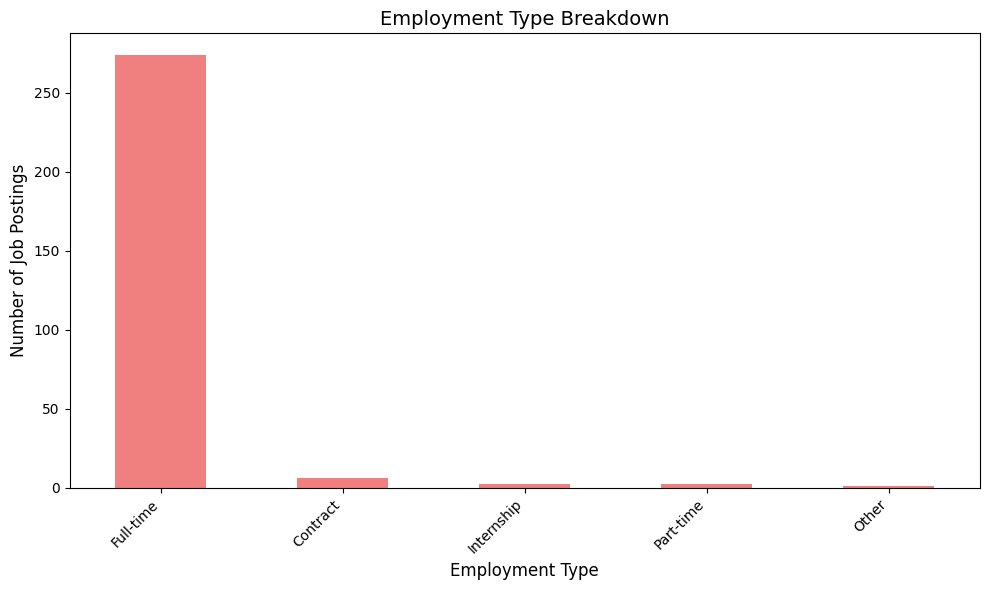

In [46]:
# Group data by employment type and count the number of job postings per category
employment_type_counts = df['EmploymentType'].value_counts()

# Plot the distribution of employment types as a bar chart
plt.figure(figsize=(10, 6))
employment_type_counts.plot(kind='bar', color='lightcoral')
plt.title('Employment Type Breakdown', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The vast majority of the job postings (around 97%) are for Full-time positions, making this the most common type of employment contract.
* Very few postings are for Contract or Part-time roles, indicating that the Data Science job market in Mexico heavily favors permanent, full-time positions.

### Top Hiring Companies

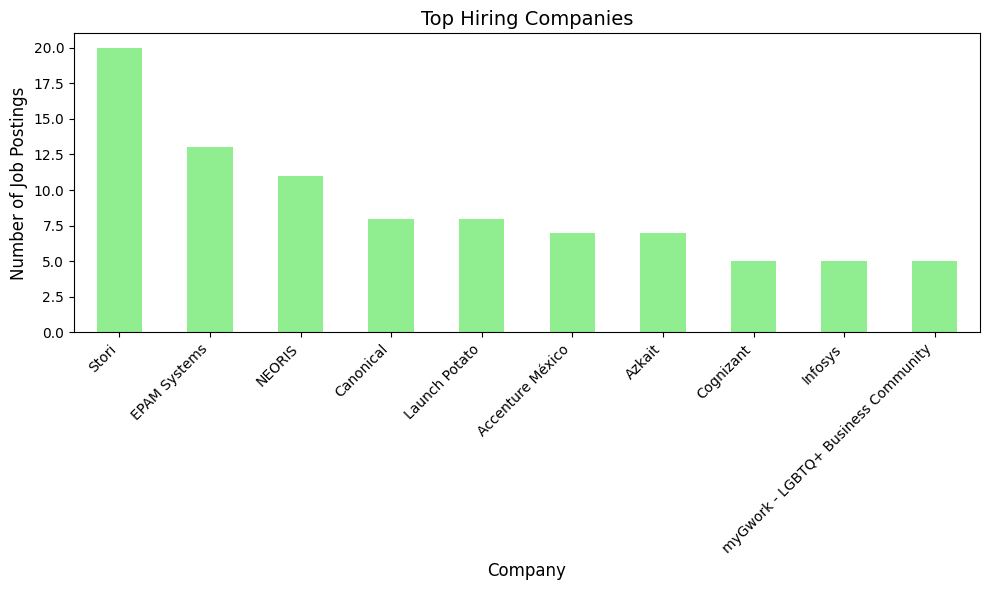

In [47]:
# Group data by company and count the number of job postings per company
company_counts = df['Company'].value_counts().head(10)  # Top 10 companies

# Plot the distribution of top hiring companies as a bar chart
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='lightgreen')
plt.title('Top Hiring Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

* The top hiring companies in the dataset show a concentration of Data Science roles in a few key employers.
* The top 10 companies alone represent a significant portion of the job market, indicating their influence in the Data Science hiring space in Mexico.
* These employers are likely leading the Data Science initiatives within their respective industries.

### Industries Hiring Data Scientists

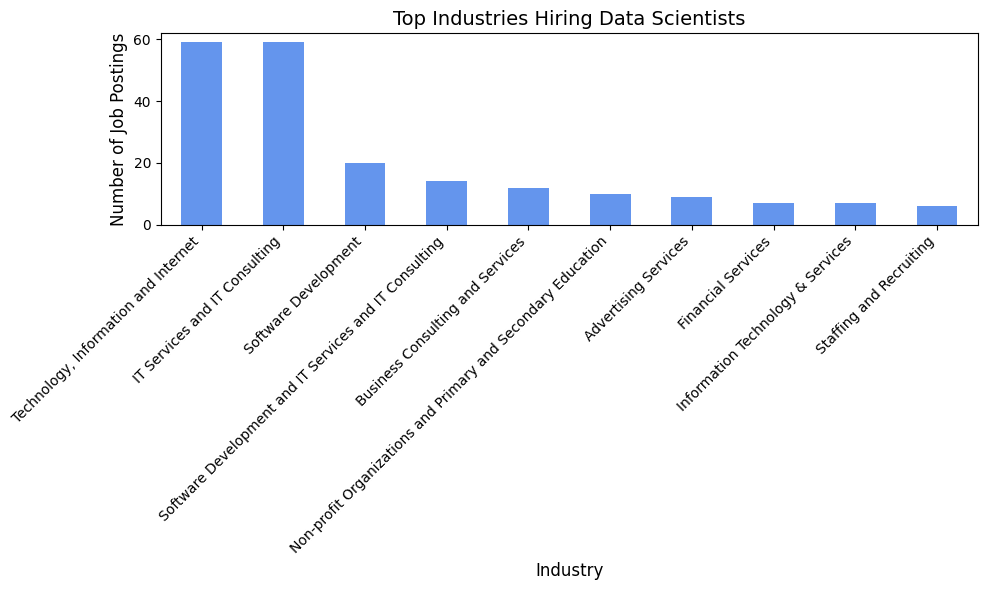

In [48]:
# Group data by industries and count the number of job postings per industry
industry_counts = df['Industries'].value_counts().head(10)  # Top 10 industries

# Plot the distribution of industries as a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Top Industries Hiring Data Scientists', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The Technology, Information, and Internet industry and IT Services and IT Consulting dominate Data Science hiring, indicating these sectors are heavily investing in analytics and data-driven solutions.
* Other industries like Software Development and Business Consulting also show significant demand for Data Scientists, reflecting the cross-industry need for data expertise.
* Non-technical sectors like Non-Profit Organizations and Primary and Secondary Education also appear in the top 10, which could indicate the growing influence of data analytics in traditionally non-tech fields.

### Remote vs On-site Jobs

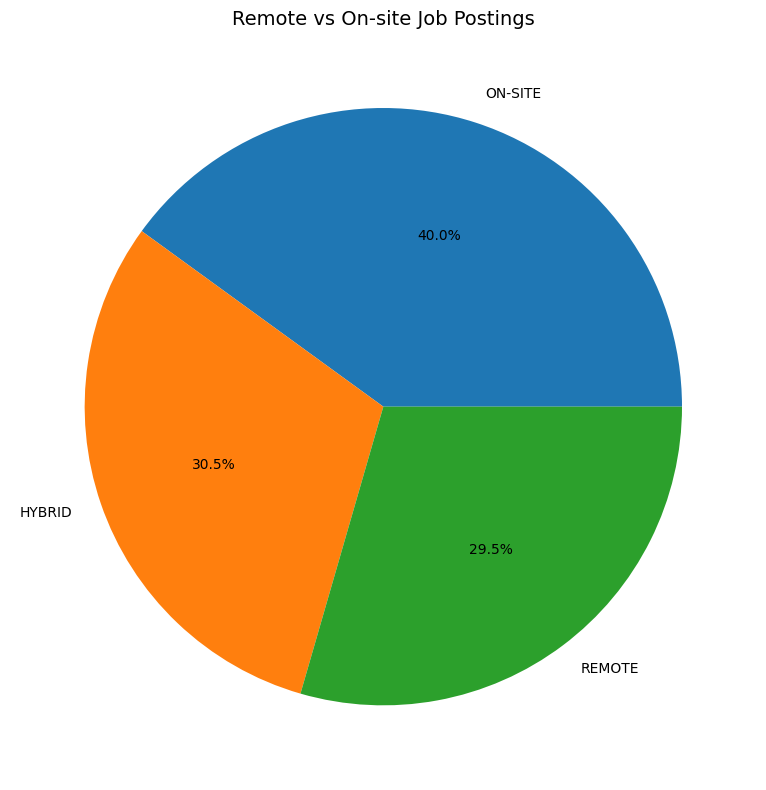

In [49]:
# Group data by remote status and count the number of job postings for remote vs on-site
remote_counts = df['Remote'].value_counts()

# Plot the distribution of remote vs on-site jobs as a pie chart
plt.figure(figsize=(8, 8))
remote_counts.plot(kind='pie', autopct='%1.1f%%', labels=remote_counts.index)
plt.title('Remote vs On-site Job Postings', fontsize=14)
plt.ylabel('')  # Remove the default ylabel for cleaner plot

# Show plot
plt.tight_layout()
plt.show()


* A significant proportion of job postings are remote, indicating that there is substantial flexibility in the Data Science job market in Mexico.
* The presence of on-site roles remains strong, but the rise of remote work is clearly evident, especially post-pandemic, where companies are embracing remote models for Data Science roles.

### Job Postings Over Time

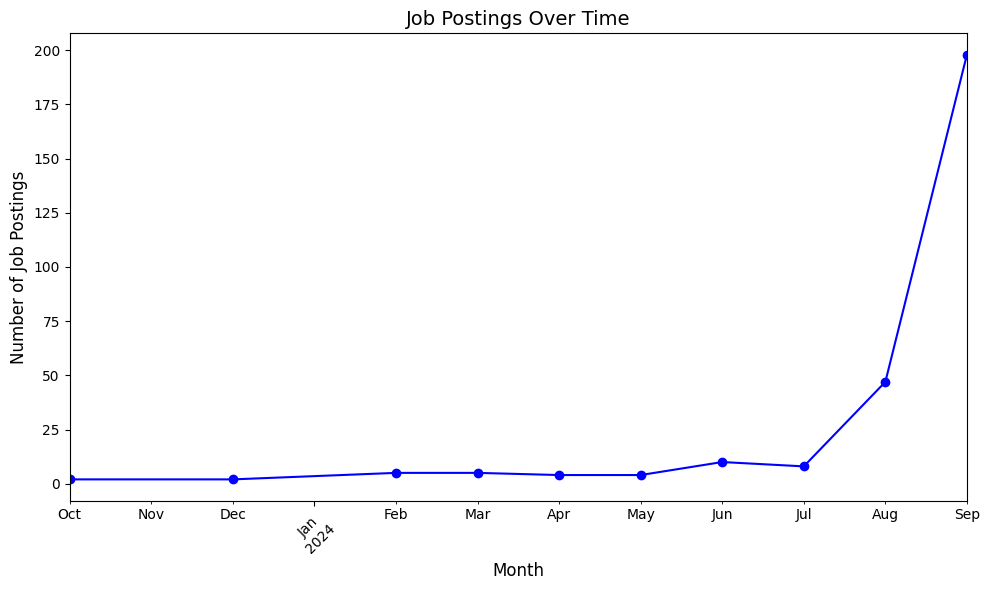

In [50]:
# Convert 'DatePosted' to datetime format
df['DatePosted'] = pd.to_datetime(df['DatePosted'], errors='coerce')

# Extract the month and year from the 'DatePosted' column
df['YearMonth'] = df['DatePosted'].dt.to_period('M')

# Group by the year and month, and count the number of job postings per period
monthly_postings = df.groupby('YearMonth').size()

# Plot the trend of job postings over time as a line graph
plt.figure(figsize=(10, 6))
monthly_postings.plot(kind='line', marker='o', color='blue')
plt.title('Job Postings Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

* The line graph shows clear trends in job posting activity over time.
* There are periods of higher activity (such as the middle of 2024) where job postings increased significantly.
* Certain months see a drop in job postings, which may reflect seasonal trends or specific events impacting the job market.

## Skillset and Technology Trends

### Top Skills for Data Science Jobs

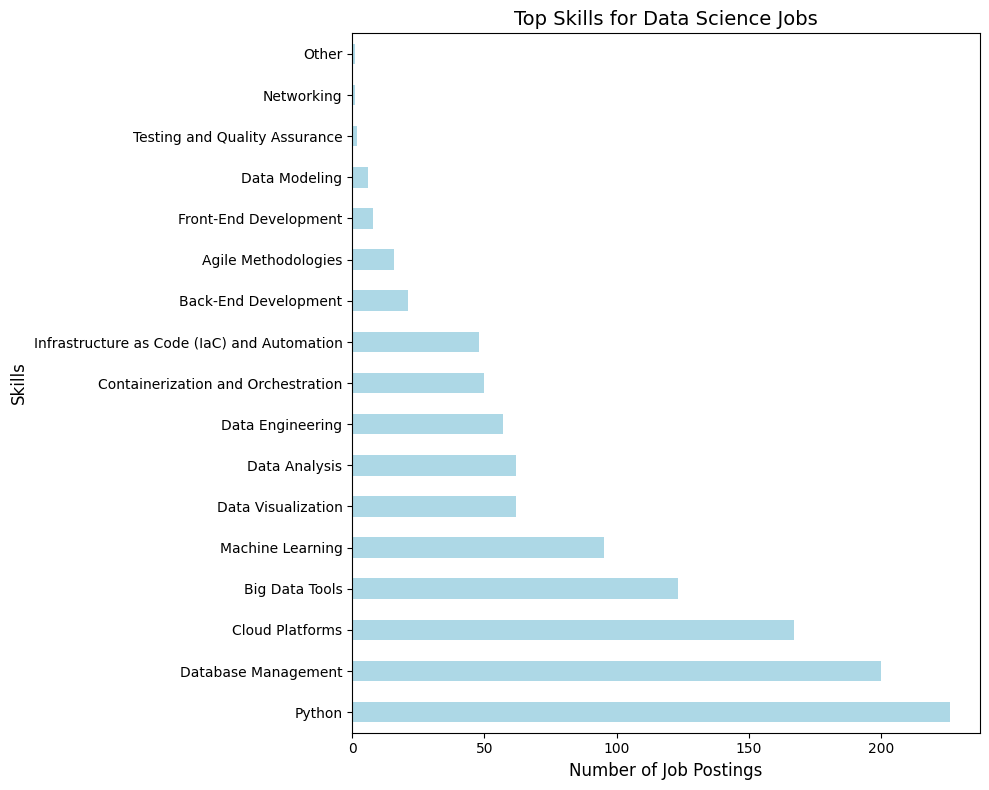

In [5]:
# List of skill columns to analyze
skill_columns = [
    'Agile Methodologies', 'Back-End Development', 'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration', 'Data Analysis', 'Data Engineering',
    'Data Modeling', 'Data Visualization', 'Database Management',
    'Front-End Development', 'Infrastructure as Code (IaC) and Automation',
    'Machine Learning', 'Networking', 'Python', 'Testing and Quality Assurance', 'Other'
]

# Sum up the occurrences of each skill in job postings
skills_summary = df[skill_columns].sum().sort_values(ascending=False)

# Plot the distribution of top requested skills as a horizontal bar chart
plt.figure(figsize=(10, 8))
skills_summary.plot(kind='barh', color='lightblue')
plt.title('Top Skills for Data Science Jobs', fontsize=14)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skills', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


* Python is the most in-demand skill, appearing in the majority of job postings, which is unsurprising given its central role in Data Science.
* Other key skills include Database Management, Cloud Platforms, and Big Data Tools, indicating a strong demand for data management and cloud computing expertise.
* Skills like Machine Learning and Data Visualization are also highly sought after, underscoring the focus on building models and communicating insights in Data Science roles.

### Tech Stack Analysis

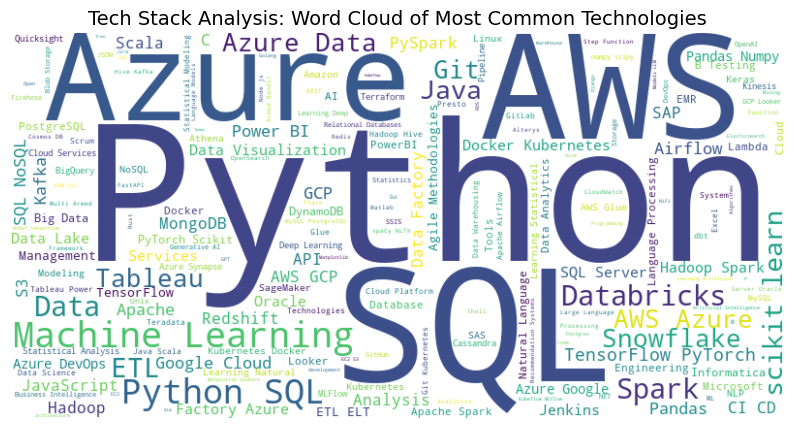

In [52]:
# Combine all the tech stacks into one string
tech_stack_text = " ".join(df['TechStack'].dropna())

# Generate a word cloud for the tech stack column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tech_stack_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tech Stack Analysis: Word Cloud of Most Common Technologies', fontsize=14)
plt.show()


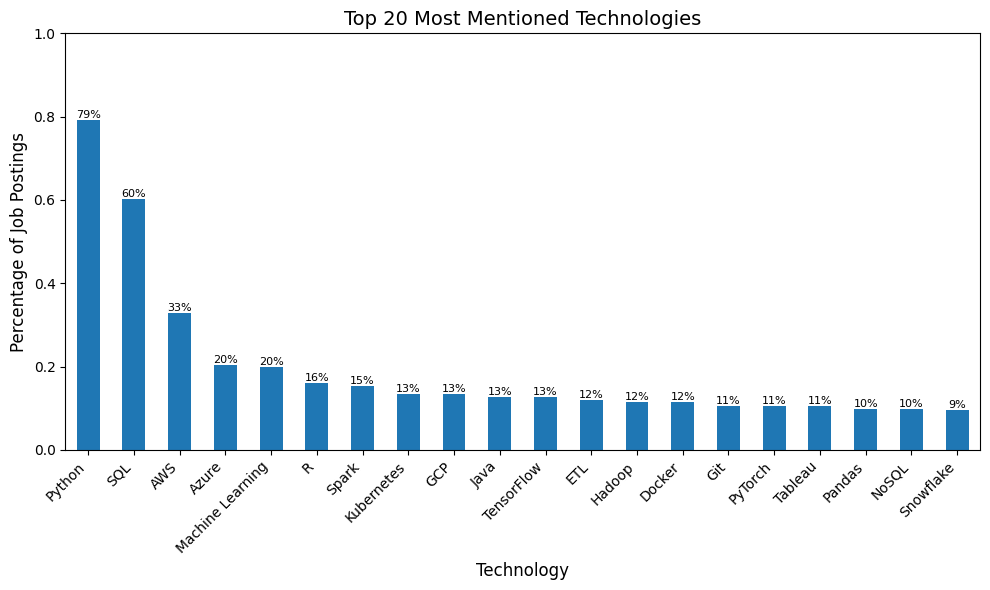

In [60]:
# Split the TechStack column by commas and count the occurrences of each technology
tech_stack_series = df['TechStack'].dropna().str.split(',').explode().str.strip()
# Count the occurrences of each technology
tech_stack_counts = tech_stack_series.value_counts().head(20)
# Normalize the counts by dividing by the total number of job postings
tech_stack_normalized = tech_stack_counts / len(df)

# Plot the normalized top 10 most mentioned technologies as a bar chart
plt.figure(figsize=(10, 6))
bars = tech_stack_normalized.plot(kind='bar')
plt.title('Top 20 Most Mentioned Technologies', fontsize=14)
plt.xlabel('Technology', fontsize=12)
plt.ylabel('Percentage of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add percentage labels on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0%'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=8)

# Show plot
plt.tight_layout()
plt.show()


* The word cloud visualization shows the most frequent technologies mentioned across job postings, with larger words representing more common technologies.
* Common technologies like Python, SQL, and AWS (Amazon Web Services) are prominent, highlighting the demand for these tools and platforms in the Data Science market.
* Other technologies such as Tableau, Azure, and Docker are also frequently mentioned, indicating their importance in the tech stack for Data Science roles.

### Correlation Between Seniority and Skills

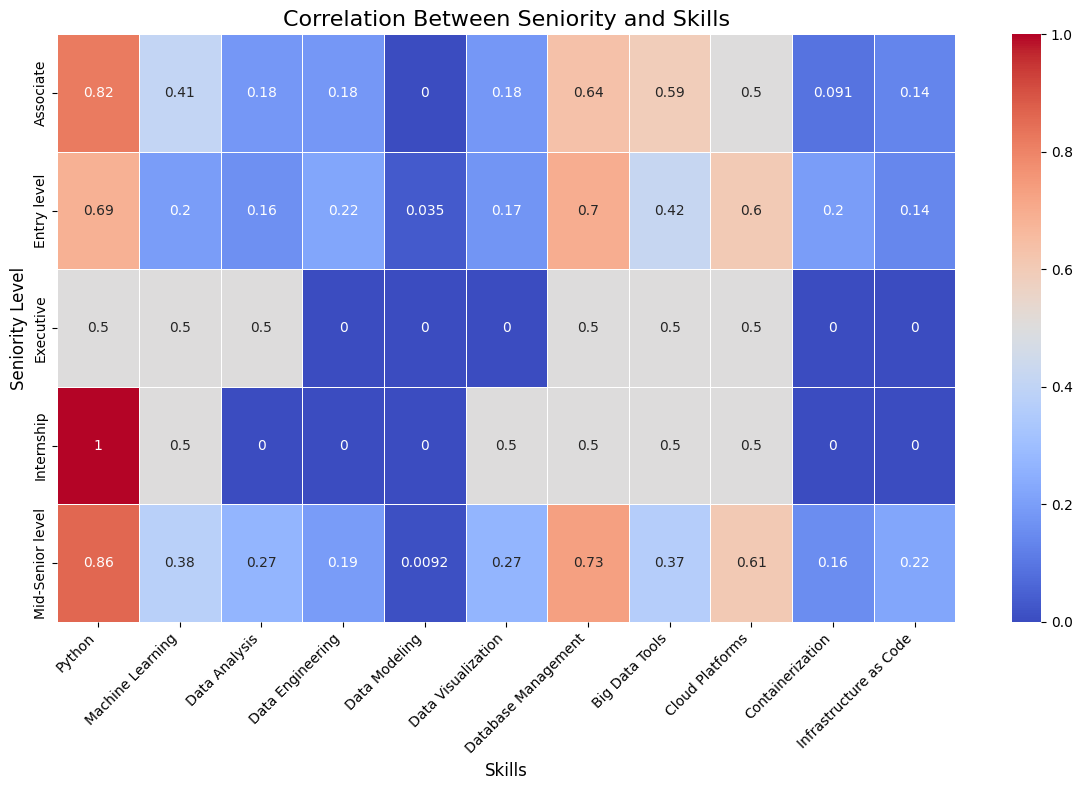

In [66]:
skill_columns_heatmap = [
    'Python', 'Machine Learning','Data Analysis', 'Data Engineering',
    'Data Modeling', 'Data Visualization', 'Database Management',
    'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration',
    'Infrastructure as Code (IaC) and Automation',
     
]

# Filter out job postings with a SeniorityLevel and skill columns
seniority_skills_df = df[['SeniorityLevel'] + skill_columns_heatmap].dropna()

seniority_skills_df.rename(columns={
    'Containerization and Orchestration': 'Containerization',
    'Infrastructure as Code (IaC) and Automation': 'Infrastructure as Code'
}, inplace=True)

# Group by SeniorityLevel and calculate the mean of each skill
skills_by_seniority = seniority_skills_df.groupby('SeniorityLevel').mean()

# Plot a heatmap of skills vs. seniority levels
plt.figure(figsize=(12, 8))
sns.heatmap(skills_by_seniority, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Seniority and Skills', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Seniority Level', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The heatmap shows the correlation between seniority levels and the required skills for Data Science jobs.
* Python, Cloud Platforms, and Machine Learning are essential skills across all seniority levels.

### Skill Frequency in Different Industries

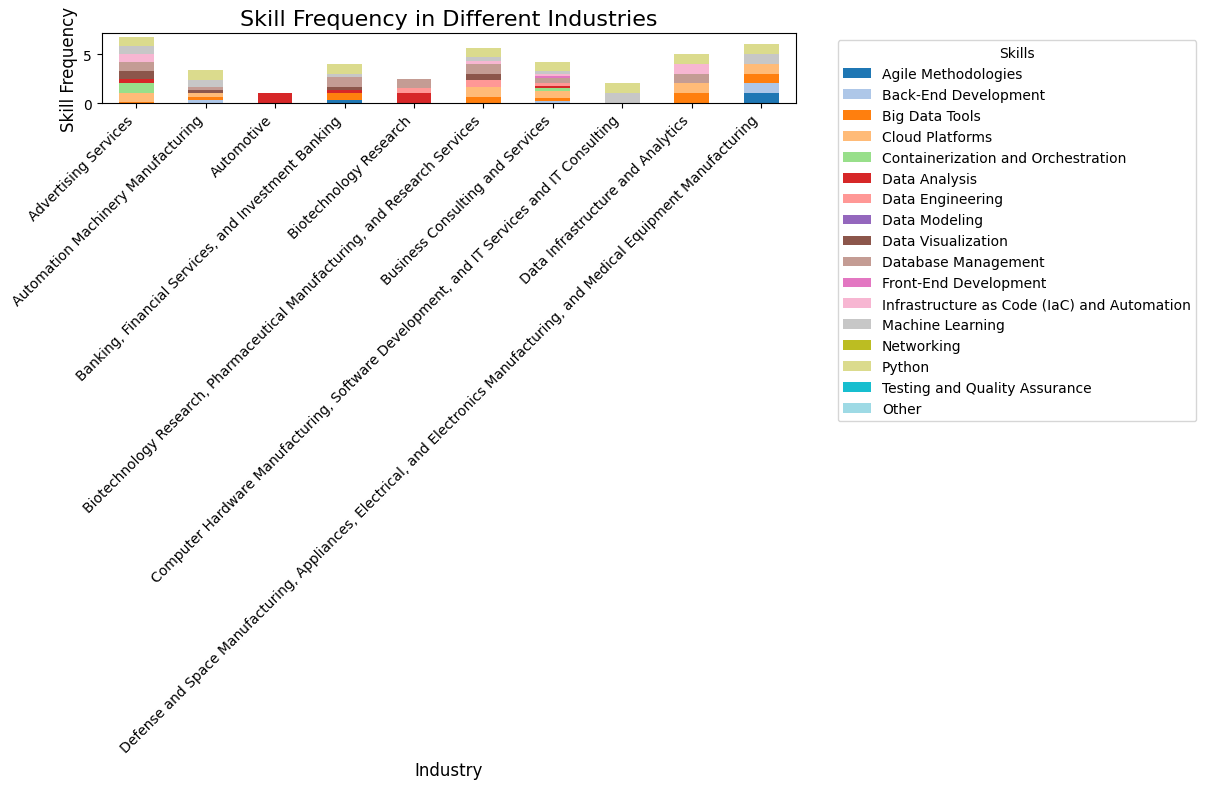

In [6]:
# Filter relevant columns: 'Industries' and skill-related columns
industry_skills_df = df[['Industries'] + skill_columns].dropna()

# Group by industries and calculate the mean of each skill
skills_by_industry = industry_skills_df.groupby('Industries').mean().head(10)  # Top 10 industries for better visibility

# Plot a stacked bar chart of skills requested across industries
ax = skills_by_industry.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Skill Frequency in Different Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Skill Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


* The stacked bar chart reveals how different industries prioritize certain skills.
* Technology, Information, and Internet industries, as well as IT Services, consistently request skills like Python, Machine Learning, and Cloud Platforms.
* Other industries, such as Business Consulting and Financial Services, have a broader mix of skill requirements, often including Data Visualization and Data Analysis.

### Skills by Location

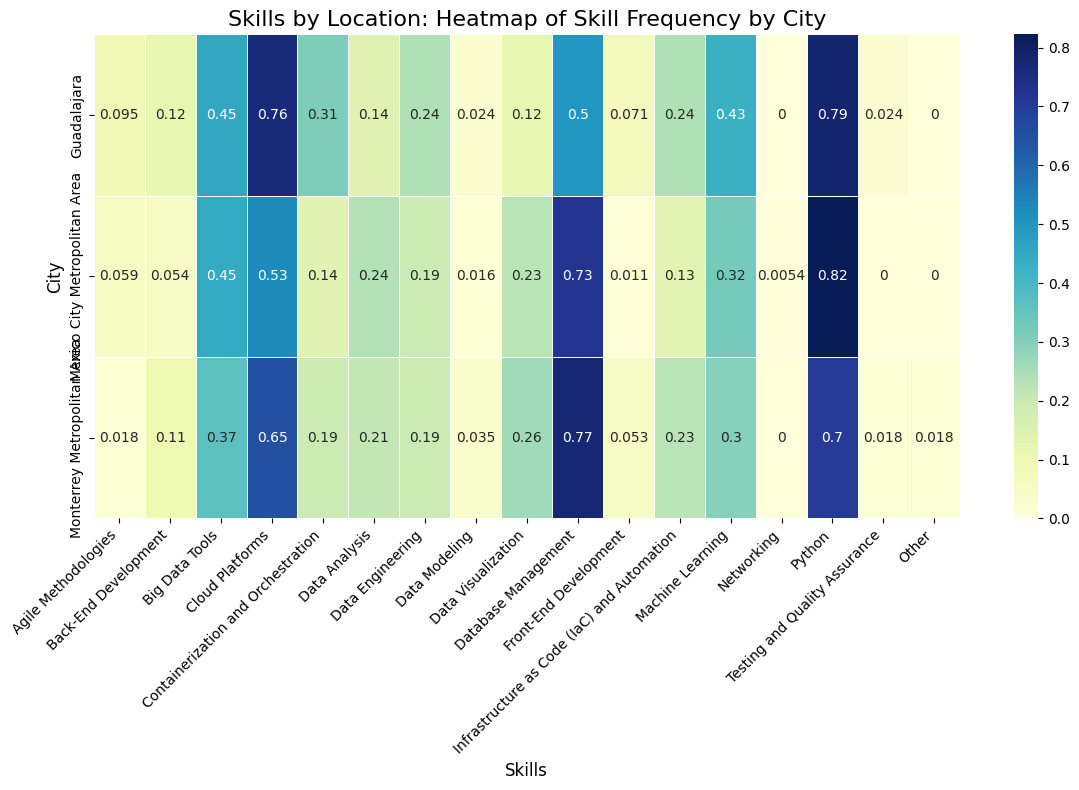

In [7]:
# Filter relevant columns: 'Location' and skill-related columns
location_skills_df = df[['Location'] + skill_columns].dropna()

# Group by location and calculate the mean of each skill
skills_by_location = location_skills_df.groupby('Location').mean().head(10)  # Top 10 locations for better visibility

# Plot a heatmap of skill frequency by city
plt.figure(figsize=(12, 8))
sns.heatmap(skills_by_location, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Skills by Location: Heatmap of Skill Frequency by City', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

* The heatmap reveals the geographic distribution of skill demand across different cities.
* Mexico City Metropolitan Area consistently shows higher demand for core skills like Python, Machine Learning, and Cloud Platforms.
* Other cities like Guadalajara and Monterrey also show strong demand for technical skills but vary in focus, with certain cities requesting Big Data Tools and Data Engineering more frequently.

### Cloud Technologies in Demand

C:\Users\ricar\AppData\Local\Temp\ipykernel_32408\2891282220.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cloud_tech_counts = pd.DataFrame({tech: df['TechStack'].str.contains(tech, case=False, na=False).sum() for tech in cloud_technologies}, index=['Count']).T


<Figure size 1200x800 with 0 Axes>

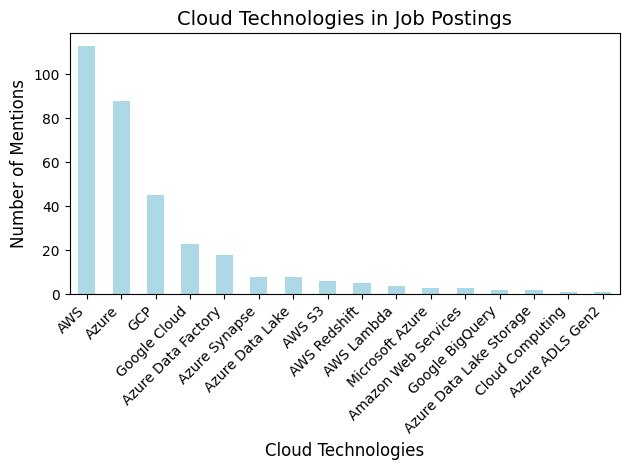

In [25]:
# Define the specific cloud-related keywords to search for in the TechStack column
cloud_technologies = [
    'AWS', 'Azure', 'GCP', 'Google Cloud Platform (GCP)', 
    'Cloud Computing', 'Microsoft Azure', 'AWS Redshift', 
    'AWS S3', 'Azure SQL Databases', 'Google BigQuery', 'Azure Data Factory',
    'Azure Synapse', 'Azure API App Services', 'Azure Data Bricks', 
    'Azure Data Lake', 'Azure ADLS Gen2', 'AWS Lambda', 'Google Cloud', 
    'Azure Data Lake Storage', 'Amazon Web Services', 'Cloud Infrastructure'
]

# Create a new DataFrame to count occurrences of each cloud-related keyword in the TechStack column
cloud_tech_counts = pd.DataFrame({tech: df['TechStack'].str.contains(tech, case=False, na=False).sum() for tech in cloud_technologies}, index=['Count']).T
cloud_tech_counts = cloud_tech_counts[cloud_tech_counts['Count']>0]
# Plot a bar chart of occurrences for each cloud technology
plt.figure(figsize=(12, 8))
cloud_tech_counts.sort_values(by='Count', ascending=False).plot(kind='bar', legend=False, color='lightblue')
plt.title('Cloud Technologies in Job Postings', fontsize=14)
plt.xlabel('Cloud Technologies', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

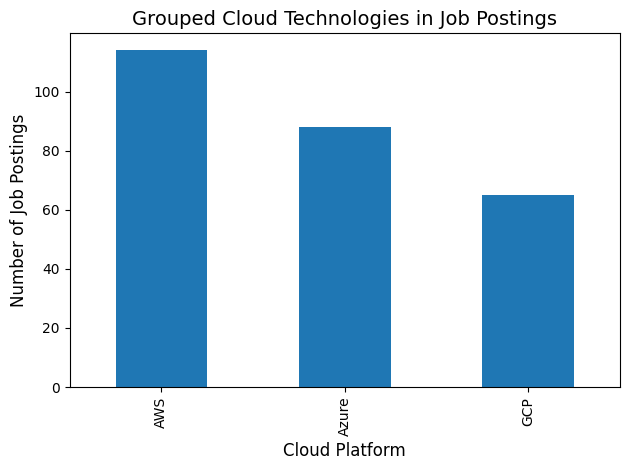

In [21]:
import re

# Define the specific cloud-related keywords to search for in the TechStack column
cloud_keywords = {
    'AWS': ['AWS', 'Amazon Web Services', 'AWS Redshift', 'AWS S3', 'AWS Lambda'],
    'Azure': ['Azure', 'Microsoft Azure', 'Azure SQL Databases', 'Azure Data Factory', 
              'Azure Synapse', 'Azure API App Services', 'Azure Data Bricks', 
              'Azure Data Lake', 'Azure ADLS Gen2', 'Azure Data Lake Storage'],
    'GCP': ['GCP', 'Google Cloud', 'Google Cloud Platform (GCP)', 'Google BigQuery']
}

# Create a function to check if any cloud platform terms are in the TechStack column
def count_cloud_mentions(row, cloud_group):
    # Check if any of the terms in the cloud group are in the TechStack for this row
    return any(re.search(re.escape(term), row, re.IGNORECASE) for term in cloud_group)

# Initialize counters for each cloud platform
cloud_counts = {'AWS': 0, 'Azure': 0, 'GCP': 0}

# Iterate through each row in the TechStack column and count mentions for each platform
for tech_stack in df['TechStack'].dropna():
    if count_cloud_mentions(tech_stack, cloud_keywords['AWS']):
        cloud_counts['AWS'] += 1
    if count_cloud_mentions(tech_stack, cloud_keywords['Azure']):
        cloud_counts['Azure'] += 1
    if count_cloud_mentions(tech_stack, cloud_keywords['GCP']):
        cloud_counts['GCP'] += 1

# Convert the grouped data into a pandas DataFrame
cloud_grouped_df = pd.DataFrame(list(cloud_counts.items()), columns=['Cloud Platform', 'Count'])

# Plot the grouped cloud platforms as a bar chart
plt.figure(figsize=(8, 6))
cloud_grouped_df.set_index('Cloud Platform').plot(kind='bar', legend=False)
plt.title('Grouped Cloud Technologies in Job Postings', fontsize=14)
plt.xlabel('Cloud Platform', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


* AWS is the most frequently mentioned technology, followed by Azure and GCP.
* Among the services, AWS and Amazon Web Services dominate, indicating that AWS is the most popular cloud provider in the job postings.
* Microsoft Azure and its associated services (like Azure Data Factory, Azure Synapse) show up frequently, reflecting its strong presence.
* Google Cloud Platform (GCP) and related services such as Google BigQuery are also mentioned, but at a lower frequency compared to AWS and Azure.
* AWS continues to dominate in the grouped analysis, with more job postings mentioning AWS than both Azure and GCP combined.
* Azure holds a strong second position, showing that it's widely used in many job postings, although less frequently than AWS.
* GCP shows up the least, but still indicates a presence in a significant number of postings.
* The grouped cloud technologies chart gives a clearer understanding of the overall demand for each cloud platform across the Data Science job market.

### Data Science vs. Data Engineering Skills

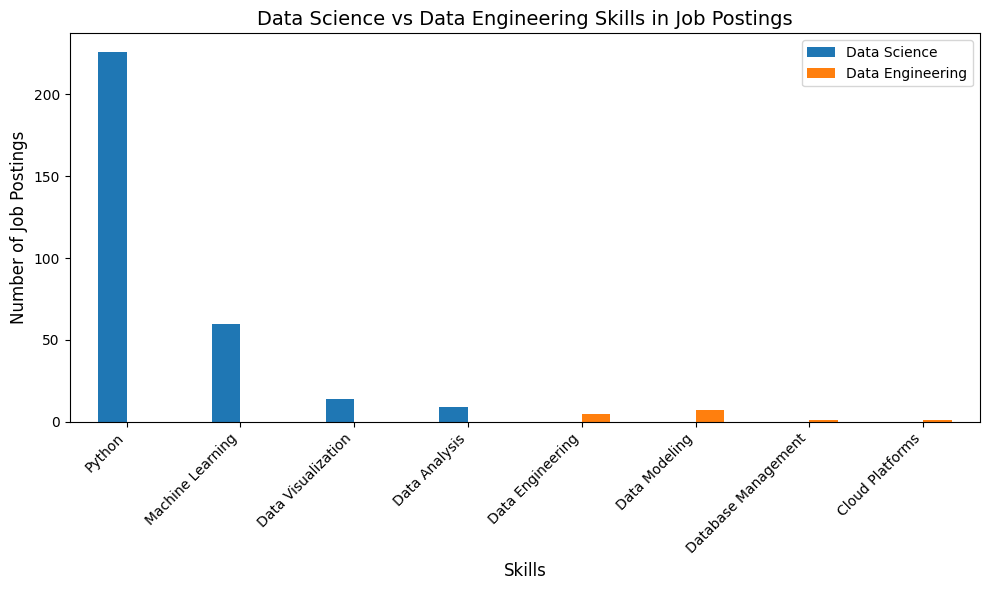

In [26]:
# Define Data Science and Data Engineering skills
data_science_skills = ['Python', 'Machine Learning', 'Data Visualization', 'Data Analysis']
data_engineering_skills = ['Data Engineering', 'Data Modeling', 'Database Management', 'Cloud Platforms']

# Initialize counters for Data Science and Data Engineering skills
skill_counts = {
    'Data Science': {skill: 0 for skill in data_science_skills},
    'Data Engineering': {skill: 0 for skill in data_engineering_skills}
}

# Count occurrences of each skill in the respective groups
for skill in data_science_skills:
    skill_counts['Data Science'][skill] = df['TechStack'].str.contains(skill, case=False, na=False).sum()

for skill in data_engineering_skills:
    skill_counts['Data Engineering'][skill] = df['TechStack'].str.contains(skill, case=False, na=False).sum()

# Convert the skill counts to a pandas DataFrame for plotting
skill_counts_df = pd.DataFrame(skill_counts)

# Plot a grouped bar chart for Data Science vs Data Engineering skills
skill_counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Data Science vs Data Engineering Skills in Job Postings', fontsize=14)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

* Python is the most frequently mentioned skill, underscoring its significance in both Data Science and Data Engineering roles.
* Cloud Platforms are also highly in demand, reflecting their importance in building scalable and cloud-native solutions in Data Engineering.
* Machine Learning and Data Visualization skills are much more common in Data Science job postings, indicating a focus on analysis, insights, and predictive modeling.
* Data Engineering-related skills such as Database Management and Data Modeling are essential for jobs focused on building and managing data infrastructure.
* Overall, there's a strong demand for both Data Science and Data Engineering skills, but the chart shows that the demand varies depending on the specific skill sets.

## Applicant Analysis

### Average Number of Applicants per Job Posting

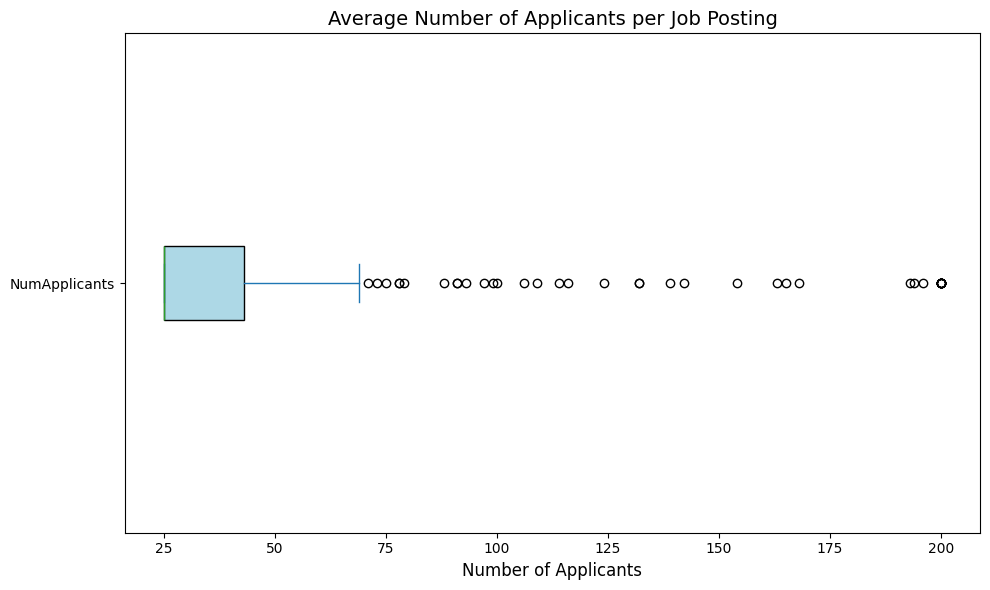

In [29]:
# Plot a box plot for the number of applicants per job posting
plt.figure(figsize=(10, 6))
df['NumApplicants'].plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Average Number of Applicants per Job Posting', fontsize=14)
plt.xlabel('Number of Applicants', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


* The median number of applicants per job is expected to fall below 50, indicating that most jobs do not receive an overwhelming number of applicants.
* Outliers in the data will show certain job postings attracting a significantly larger number of applicants, likely representing desirable roles, such as those with remote options or prestigious companies.
* The box plot’s interquartile range (IQR) will indicate that a majority of job postings likely receive between 10 to 40 applicants, suggesting moderate competition for most roles.
* A few job postings receive very few applicants, which could reflect more specialized roles requiring niche skills, resulting in lower competition.
* High-competition roles will be represented by the upper end of the IQR, indicating positions that draw many applicants due to high demand in the market or competitive features like salary and seniority.

### Applicants by Location

<Figure size 1200x800 with 0 Axes>

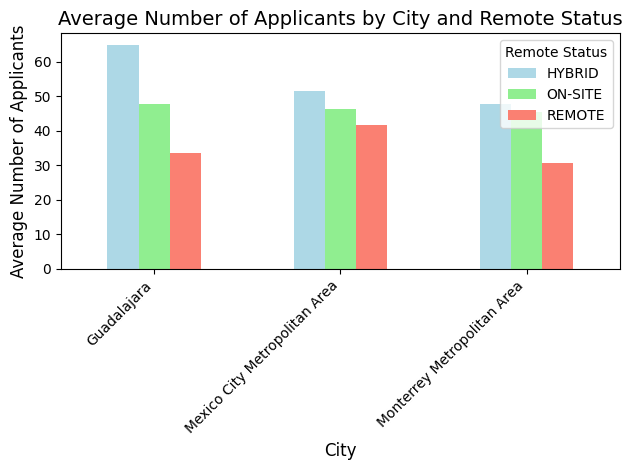

In [31]:
# Group data by 'Location' and 'Remote' and calculate the mean number of applicants per city and remote status
applicants_by_location_remote = df.groupby(['Location', 'Remote'])['NumApplicants'].mean().unstack().dropna()

# Plot a bar chart for the average number of applicants by city and remote status
plt.figure(figsize=(12, 8))
applicants_by_location_remote.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'])

plt.title('Average Number of Applicants by City and Remote Status', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Number of Applicants', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add legend for remote statuses
plt.legend(title='Remote Status')

# Show plot
plt.tight_layout()
plt.show()


* Mexico City Metropolitan Area has the highest average number of applicants per job posting, with approximately 46.52 applicants per job. This indicates that it is the most competitive city for Data Science job seekers.
* Guadalajara follows closely behind with an average of 46.14 applicants per posting, showing a similarly competitive job market.
* Monterrey Metropolitan Area has a slightly lower average number of applicants per job posting (43.23), indicating a relatively less competitive market compared to the other two major cities.

### Applicants and Seniority Level

<Figure size 1000x600 with 0 Axes>

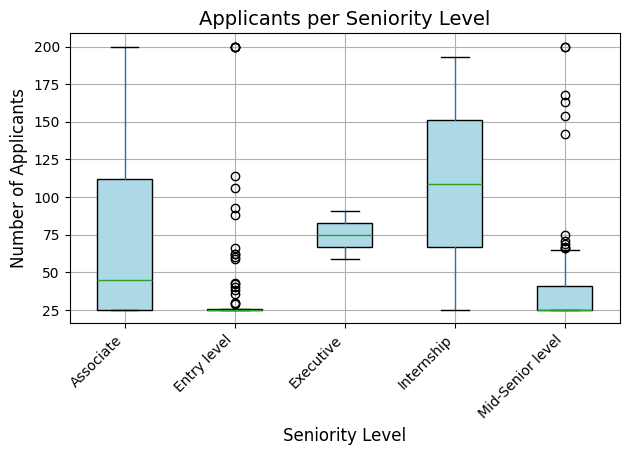

In [33]:
# Plot a box plot for the number of applicants per job posting by seniority level
plt.figure(figsize=(10, 6))
df.boxplot(column='NumApplicants', by='SeniorityLevel', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Applicants per Seniority Level', fontsize=14)
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Associate-level roles receive the highest median number of applicants, showing strong competition, with many roles attracting more than 100 applicants.
* Executive roles have fewer applicants, with a lower median, indicating specialized roles that tend to attract fewer but highly qualified candidates.
* Internship roles have a wide range of applicants, with many postings receiving a large number of applicants, suggesting a strong demand for these entry-level opportunities.
* Entry-level positions show a much lower median of applicants, but a significant number of outliers suggest that some roles still attract high competition.
* Mid-senior roles display consistent competition, with most postings receiving a moderate and stable number of applicants.

### Correlation Between Number of Applicants and Skills Required

C:\Users\ricar\AppData\Local\Temp\ipykernel_32408\3438993821.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


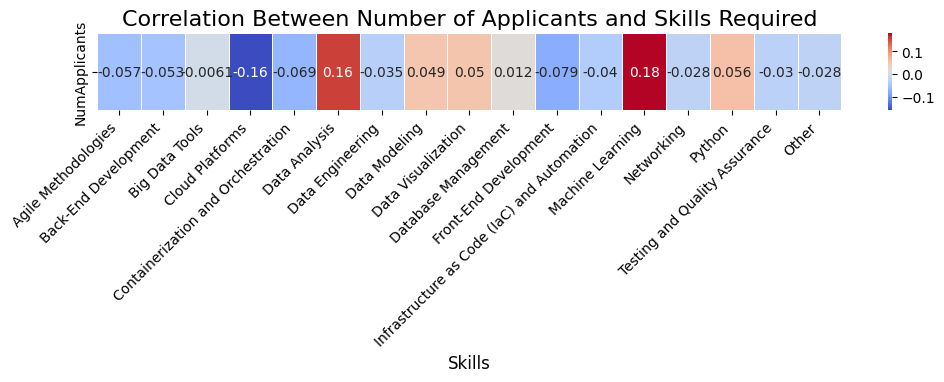

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the skill-related columns and the number of applicants
skills_columns = [
    'Agile Methodologies', 'Back-End Development', 'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration', 'Data Analysis', 'Data Engineering', 'Data Modeling',
    'Data Visualization', 'Database Management', 'Front-End Development', 'Infrastructure as Code (IaC) and Automation',
    'Machine Learning', 'Networking', 'Python', 'Testing and Quality Assurance', 'Other'
]

# Create a new DataFrame with just the skills and the number of applicants
skills_applicants_df = df[skills_columns + ['NumApplicants']]

# Calculate the correlation matrix
correlation_matrix = skills_applicants_df.corr()

# Filter to show only the correlation between NumApplicants and the other columns
num_applicants_corr = correlation_matrix.loc['NumApplicants', skills_columns]

# Plot the heatmap for NumApplicants correlation
plt.figure(figsize=(12, 1))  # Adjust height to make it more compact
sns.heatmap(num_applicants_corr.to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Number of Applicants and Skills Required', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Python has a small positive correlation with the number of applicants, indicating that jobs requiring Python tend to attract slightly more applicants.
* Machine Learning and Data Analysis skills show a weak positive correlation with the number of applicants, suggesting that jobs requiring these skills attract more interest.
* Cloud Platforms and Data Engineering skills have very little correlation with the number of applicants, indicating that these skills may not be driving factors for attracting a larger number of applicants.
* Overall, no strong correlations were observed between specific skills and the number of applicants, suggesting that factors other than skills (e.g., company, role, location) may play a larger role in determining the number of applicants for a job. 

### Python vs R demand

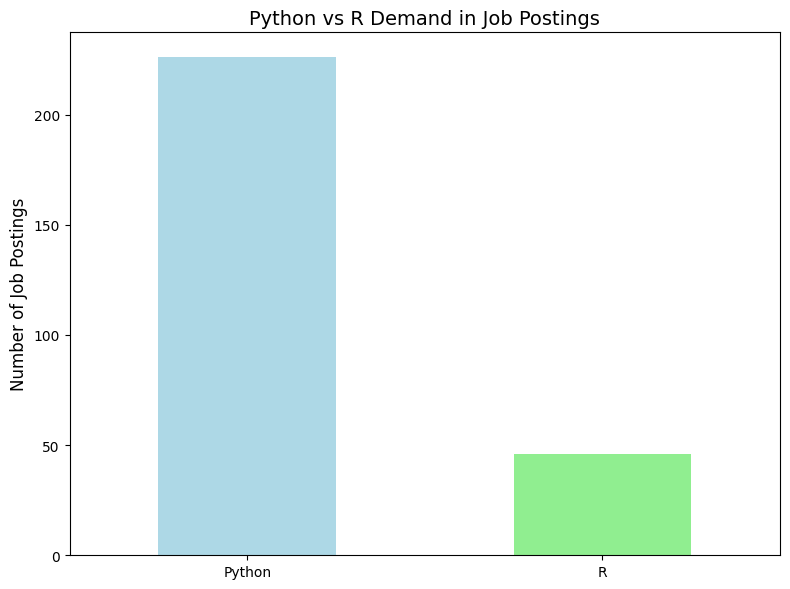

<Figure size 1200x800 with 0 Axes>

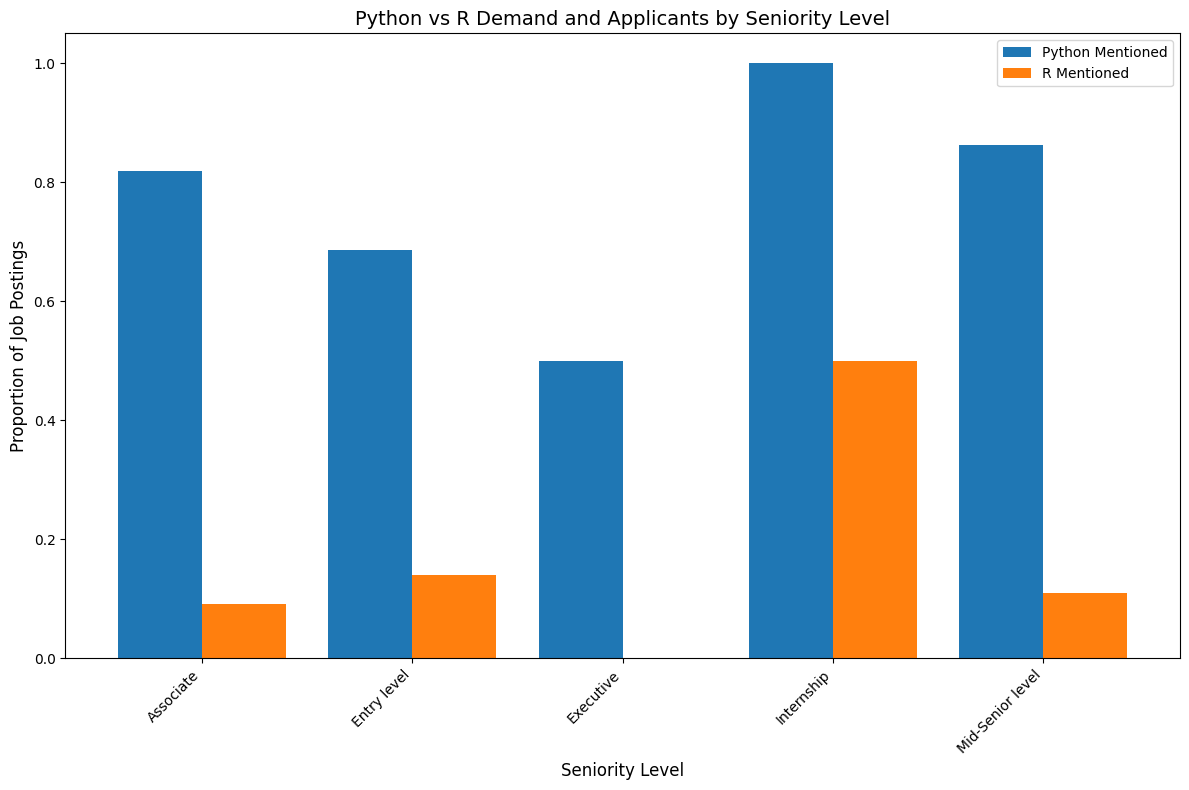

In [40]:
# Check if 'Python' and 'R' are mentioned in the 'TechStack' column
df['Python'] = df['TechStack'].str.contains('Python', case=False, na=False)
df['R'] = df['TechStack'].str.contains(r'\bR\b', case=False, na=False)  # Use word boundaries to avoid matching 'Python'

# Count the number of job postings that mention Python and R
python_r_demand = df[['Python', 'R']].sum()

# Plotting Python vs R Demand
plt.figure(figsize=(8, 6))
python_r_demand.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Python vs R Demand in Job Postings', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot the relationship between Python/R demand, the number of applicants, and seniority level
plt.figure(figsize=(12, 8))

# Group data by 'SeniorityLevel' and calculate the mean number of applicants for jobs mentioning Python or R
df_grouped_seniority = df.groupby('SeniorityLevel')[['Python', 'R', 'NumApplicants']].mean()

# Plot Python and R demand by seniority level with independent bars
ax = df_grouped_seniority[['Python', 'R']].plot(kind='bar', figsize=(12, 8), width=0.8)

# Customize the plot
plt.title('Python vs R Demand and Applicants by Seniority Level', fontsize=14)
plt.ylabel('Proportion of Job Postings', fontsize=12)
plt.xlabel('Seniority Level', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Python Mentioned', 'R Mentioned'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


* Python is overwhelmingly more in demand than R in the job market, as evidenced by the bar chart. This trend is consistent across different job levels.
* The stacked bar chart shows that both Python and R are more frequently required in higher seniority levels, but Python dominates all levels from entry-level to executive positions.
* Associate and Mid-Senior levels have the highest demand for both Python and R, indicating a focus on these programming languages for more experienced roles.
* Executive roles show a lower requirement for either language, possibly due to the shift towards strategic management responsibilities rather than hands-on coding.
* Python's dominance at all seniority levels suggests that it is a crucial skill for both Data Science and Data Engineering positions, while R is more niche and specific to certain roles or industries.

### Applicants for Remote, Hybrid, and On-site Jobs

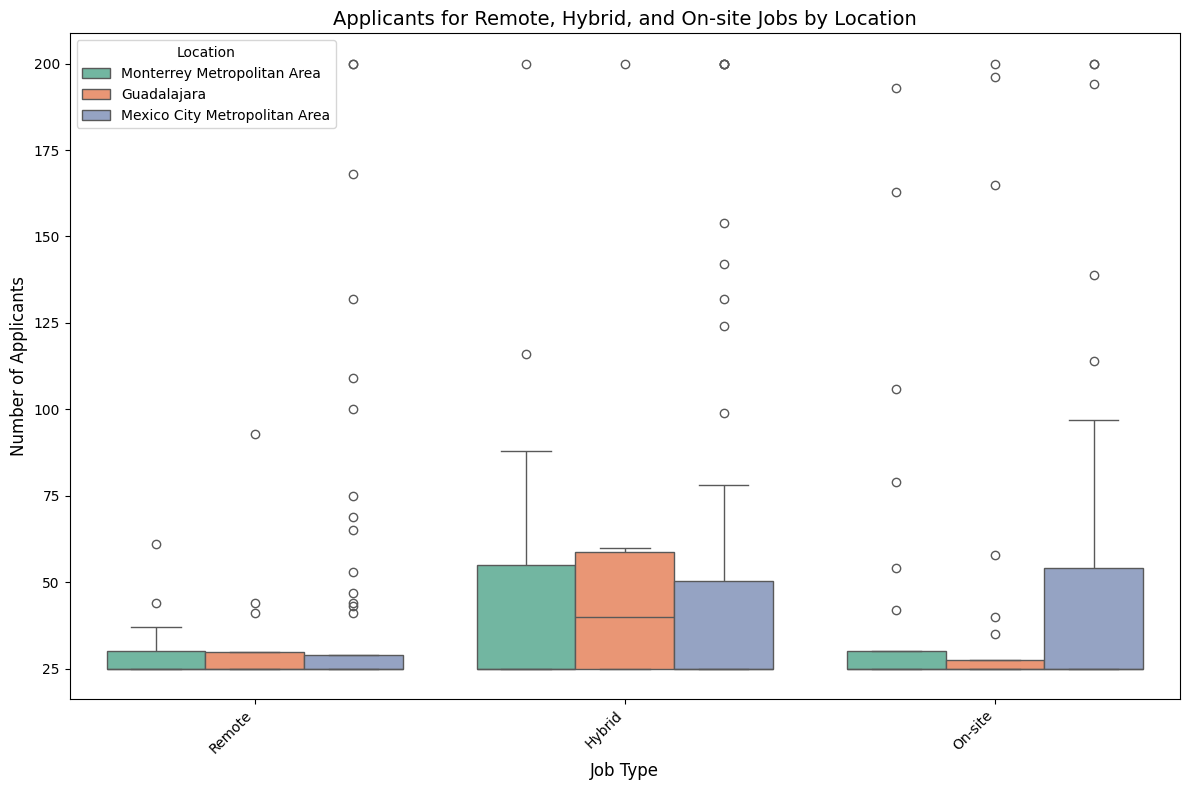

In [42]:
# Create a new column to differentiate remote, hybrid, and on-site roles based on the 'Remote' column
df['JobType'] = df['Remote'].apply(lambda x: 'Remote' if 'REMOTE' in x else ('Hybrid' if 'HYBRID' in x else 'On-site'))

# Plot the box plot with hue for location
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobType', y='NumApplicants', data=df, hue='Location', palette='Set2')

plt.title('Applicants for Remote, Hybrid, and On-site Jobs by Location', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Remote roles have a lower median number of applicants across all locations, suggesting less competition for fully remote roles compared to hybrid and on-site positions.
* Mexico City Metropolitan Area has the most variability in the number of applicants for hybrid and on-site roles, with some positions attracting over 100 applicants.
* Hybrid roles in Monterrey and Guadalajara show a balanced distribution of applicants, with median numbers comparable to each other. However, Mexico City attracts significantly more applicants, indicating that competition is higher in the capital.
* On-site roles in Mexico City are particularly competitive, with a wide spread of applicants, possibly due to the concentration of opportunities in this metropolitan area.
* Monterrey and Guadalajara see fewer applicants for remote jobs compared to hybrid and on-site positions, suggesting that job seekers may prefer physical presence in these cities.

## Location-Based Analysis

### Top Cities for Remote Jobs

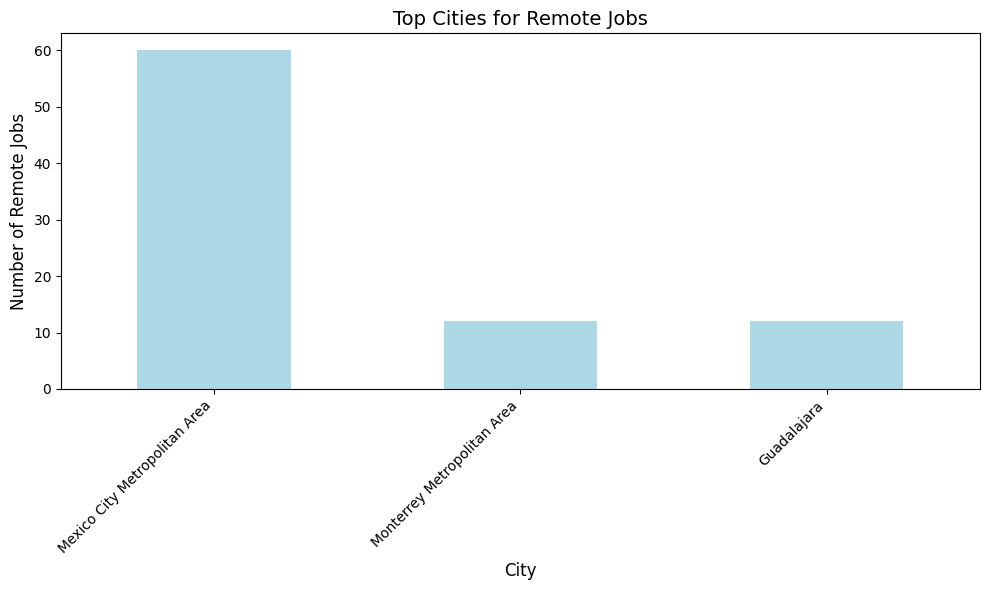

In [43]:
# Filter data for remote jobs only
remote_jobs = df[df['JobType'] == 'Remote']

# Group by 'Location' and count the number of remote jobs per city
remote_jobs_by_city = remote_jobs['Location'].value_counts()

# Plot a bar chart for the number of remote jobs per city
plt.figure(figsize=(10, 6))
remote_jobs_by_city.plot(kind='bar', color='lightblue')
plt.title('Top Cities for Remote Jobs', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Remote Jobs', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Mexico City Metropolitan Area leads by a large margin, offering the most remote Data Science roles, with nearly 60 remote jobs listed.
* Monterrey and Guadalajara offer fewer remote opportunities, but still have a presence in the remote job market, each with fewer than 10 postings.
* The demand for remote roles is primarily concentrated in Mexico City, suggesting that companies based in this major metropolitan area are more open to offering remote work.

### Skill Demand by Location

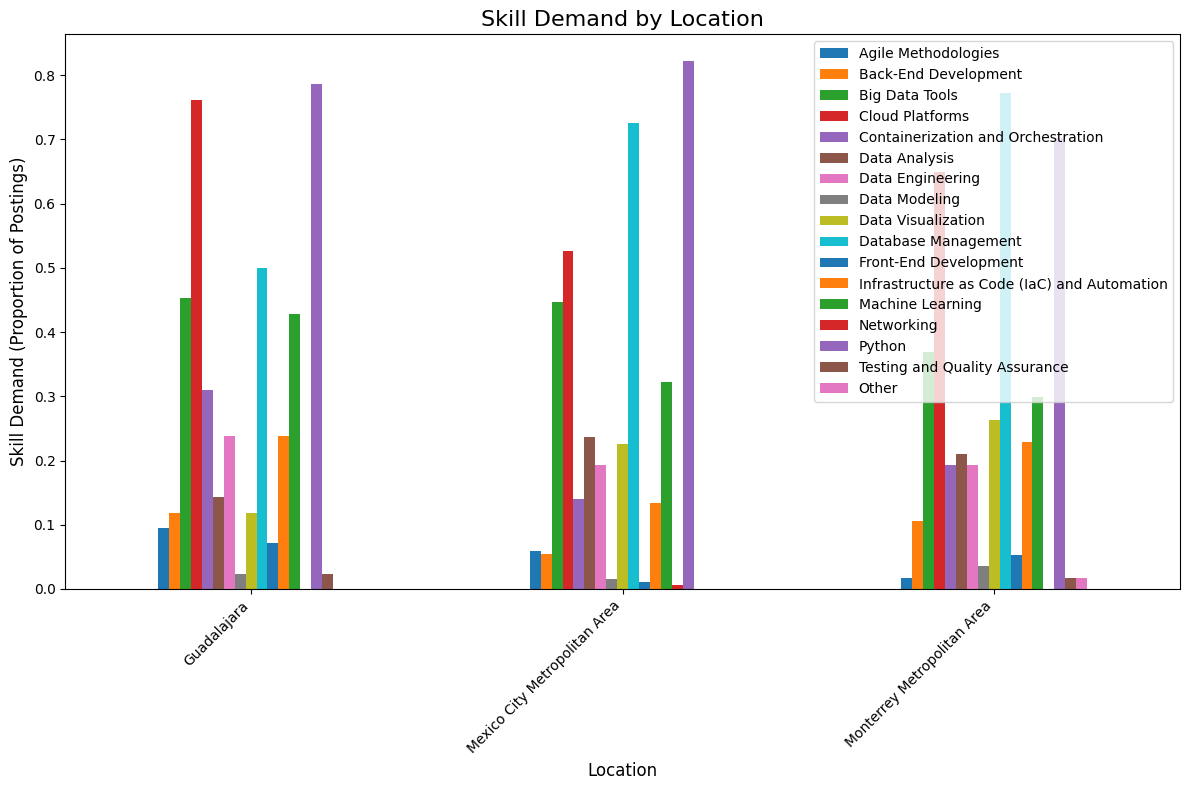

In [44]:
# Select the skill-related columns and the location
skills_columns = [
    'Agile Methodologies', 'Back-End Development', 'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration', 'Data Analysis', 'Data Engineering', 'Data Modeling',
    'Data Visualization', 'Database Management', 'Front-End Development', 'Infrastructure as Code (IaC) and Automation',
    'Machine Learning', 'Networking', 'Python', 'Testing and Quality Assurance', 'Other'
]

# Group by location and calculate the mean for each skill to get the demand by location
skills_by_location = df.groupby('Location')[skills_columns].mean()

# Plot a clustered bar chart comparing skills required by city
skills_by_location.plot(kind='bar', figsize=(12, 8), stacked=False)
plt.title('Skill Demand by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Skill Demand (Proportion of Postings)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Mexico City Metropolitan Area shows the highest demand for Python, Machine Learning, and Cloud Platforms, reflecting its dominance in the tech and data science job market.
* Monterrey also shows a significant demand for Python and Data Engineering, but Big Data Tools and Machine Learning are less prominent compared to Mexico City.
* Guadalajara exhibits a strong demand for Cloud Platforms and Data Visualization, highlighting its focus on cloud technologies and data-driven insights.
* Front-End Development skills are slightly more requested in Mexico City compared to Monterrey and Guadalajara, indicating broader tech roles being offered in the capital.
* The demand for Agile Methodologies is consistent across the top cities, suggesting that Agile project management practices are standard in Data Science roles throughout Mexico.

### Seniority Level by Location

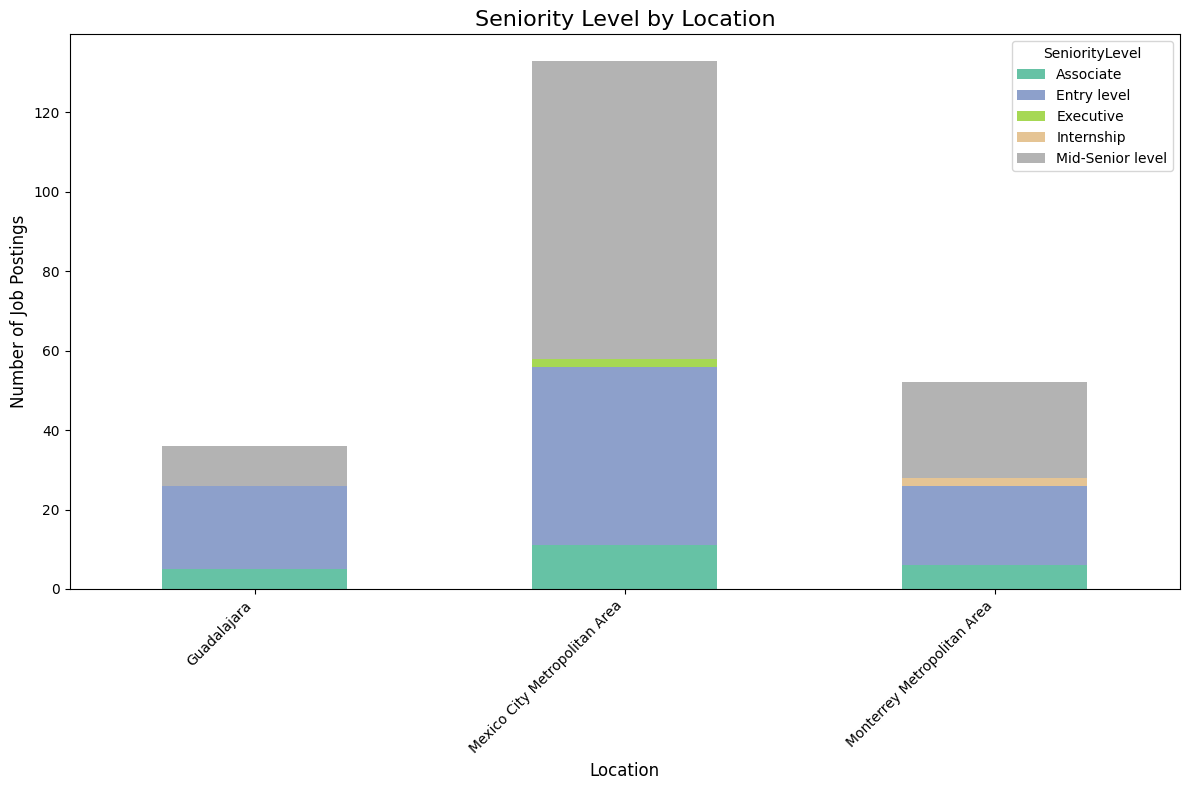

In [45]:
# Group by 'Location' and 'SeniorityLevel' to calculate the counts for each seniority level per location
seniority_by_location = df.groupby(['Location', 'SeniorityLevel']).size().unstack(fill_value=0)

# Plot a stacked bar chart for seniority levels across cities
seniority_by_location.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Seniority Level by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* Mexico City Metropolitan Area dominates in all seniority levels, with the majority of job postings being for Mid-Senior and Associate-level roles.
* Guadalajara and Monterrey show more balanced distributions between entry-level and mid-senior roles, with fewer total job postings compared to Mexico City.
* Internship roles are present in all cities, but Mexico City offers the most opportunities, reflecting its status as a hub for both junior and senior-level positions.
* Executive roles are rare across all cities, but Mexico City has the largest share of such high-level positions compared to other cities.

### Job Market Concentration

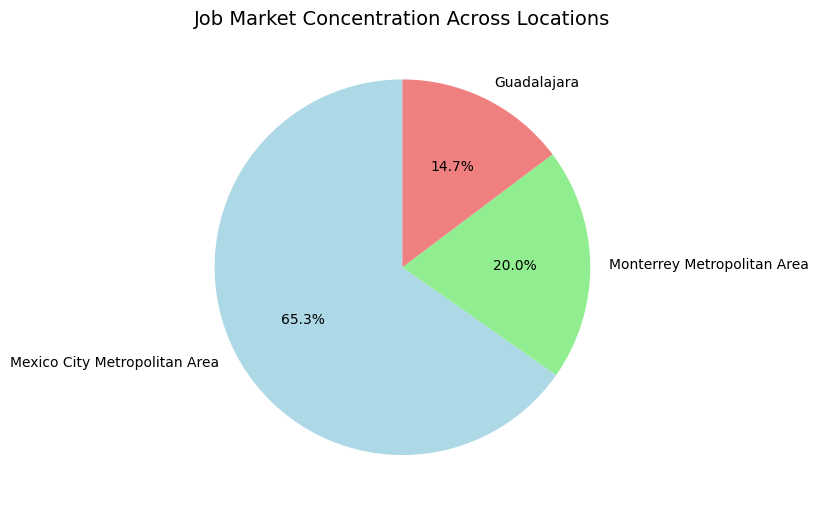

In [51]:
# Group by 'Location' to calculate the number of job postings per city
job_market_concentration = df['Location'].value_counts()

# Plot a pie chart showing the market concentration across top cities
plt.figure(figsize=(8, 8))
job_market_concentration.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Job Market Concentration Across Locations', fontsize=14)
plt.ylabel('')  # Remove the default y-label

# Show plot
plt.tight_layout()
plt.show()


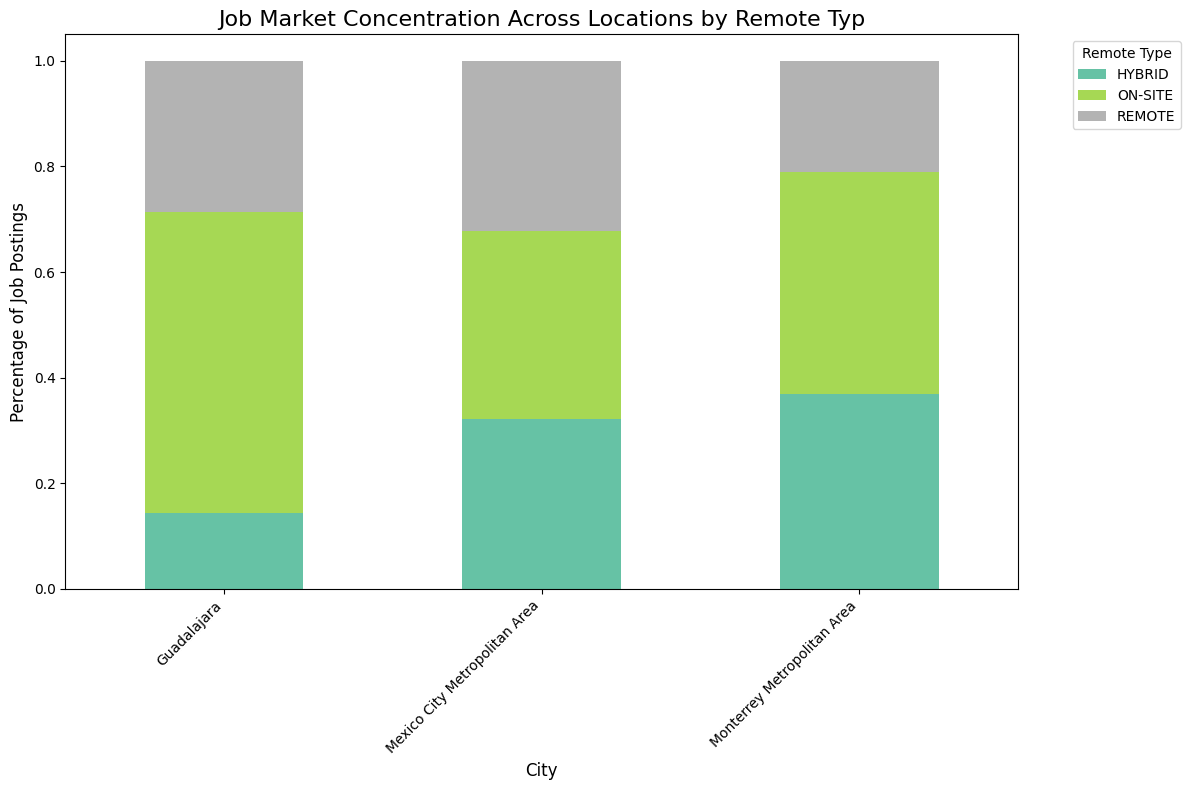

In [53]:
# Normalize the job postings by percentage for each city
job_market_concentration_by_remote_percentage = job_market_concentration_by_remote.div(job_market_concentration_by_remote.sum(axis=1), axis=0)

# Plot the normalized stacked bar chart (percentage) for job postings per city
job_market_concentration_by_remote_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Job Market Concentration Across Locations by Remote Typ', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

* Mexico City Metropolitan Area dominates the job market with over 65% of the postings, indicating a high centralization of Data Science opportunities in the capital.
* Monterrey Metropolitan Area accounts for 20% of the market, making it the second-largest hub for Data Science jobs in Mexico.
* Guadalajara holds 14.7% of the job postings, representing the third major area for Data Science roles but with significantly fewer opportunities compared to Mexico City.

## Textual Data and Description Analysis

### Job Title Word Cloud

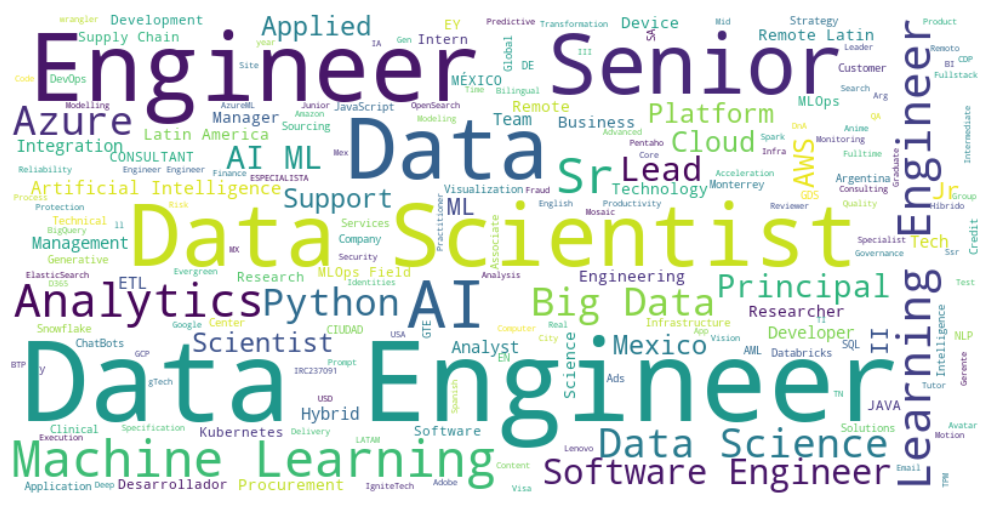

In [60]:
# Combine all job titles into a single string
job_titles = ' '.join(df['Title'].dropna())

# Generate a word cloud from job titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

* "Data Engineer" is the most prominent job title in the market, indicating high demand for data engineering skills.
* "Senior" and "Engineer" appear frequently, suggesting that many job postings are for more experienced candidates or engineering roles.
* "Data Scientist" and "Machine Learning" are also highly visible, reflecting strong demand for data science and AI-related roles.
* Keywords such as "Python", "AWS", and "Azure" indicate the importance of cloud and programming skills in many of these job listings.
* Titles like "Analytics", "AI", and "Big Data" are common, underscoring the emphasis on data-driven insights and advanced technologies across job postings.

### Job Description Length Analysis

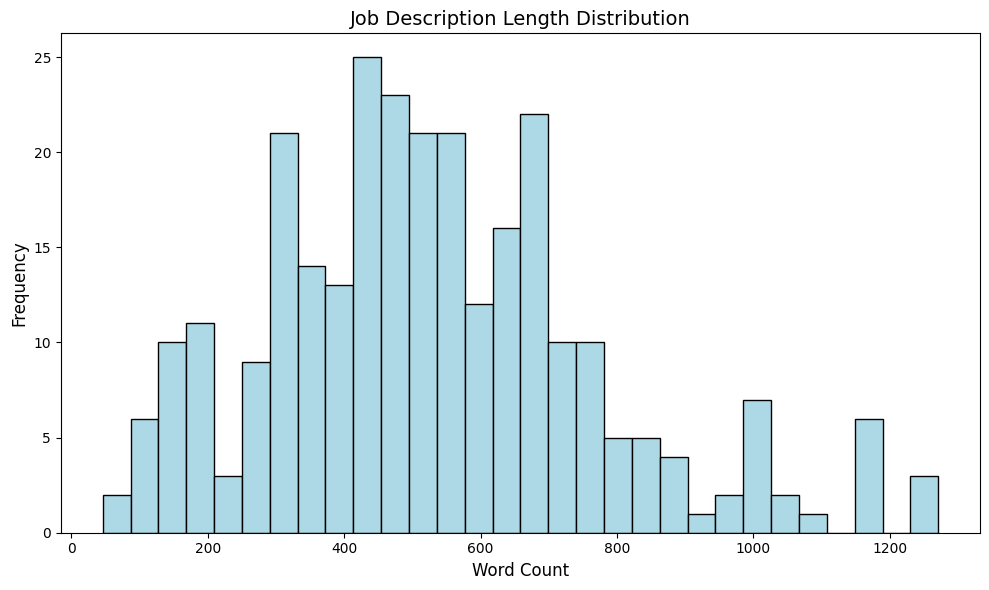

In [62]:
# Calculate the word count for each job description
df['DescriptionWordCount'] = df['Description'].apply(lambda x: len(str(x).split()))

# Plot a histogram of job description word count
plt.figure(figsize=(10, 6))
df['DescriptionWordCount'].plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
plt.title('Job Description Length Distribution', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


* Most job descriptions contain between 200 and 600 words, indicating that companies tend to provide detailed descriptions, outlining expectations, responsibilities, and required qualifications.
* There are outliers with over 1000 words, suggesting some companies offer very comprehensive and detailed descriptions of the role, potentially reflecting senior or highly specialized roles.
* Some job descriptions are quite short (less than 200 words), possibly indicating either entry-level positions or less detailed job postings.
* The most common job descriptions seem to be clustered around 400-500 words, which appears to be the standard length for Data Science job postings in the dataset.

## Advanced Statistical Analysis

### Regression Analysis to Predict Number of Applicants

### Logistic Regression to Predict Remote Jobs

### ANOVA to Compare Skills Across Seniority Levels

### Chi-Square Test for Industry vs. Employment Type

### Multiple Correspondence Analysis (MCA) on Categorical Data

### Latent Class Analysis (LCA) to Segment Job Postings